### Import libraries

In [81]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier


### Input & Output creation

In [82]:
# read file and create output file
input = 'C:/welead/project/project_root/data/curated_dataset.csv'

df = pd.read_csv(input)

In [83]:
# Separate features and target
X = df.drop(columns=['mpg', 'mpg_classes'])  # 'mpg_classes' is the column to predict
y = df['mpg_classes']

In [84]:
#first split the features from the target and then scale
# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# Reversing the scaling if needed
# reversed_data = scaler.inverse_transform(scaled_data)

In [85]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [97]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
    print("F1-Score (macro):", f1_score(y_true, y_pred, average='macro'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis",
                xticklabels=['Low', 'Med-Low', 'Med-High', 'High'],
                yticklabels=['Low', 'Med-Low', 'Med-High', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [87]:
def load_config(config_path='C:/welead/project/project_root/config.yaml'):
    with open(config_path, "r") as file:
        config = yaml.safe_load(file)
    return config

best_params = load_config()


### Ensemble models


Ensemble Model:
Accuracy: 0.8414634146341463
Precision (macro): 0.8574909495962126
Recall (macro): 0.8455882352941176
F1-Score (macro): 0.844019441281814

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.74      0.70      0.72        20
           2       0.74      1.00      0.85        20
           3       1.00      0.88      0.94        17

    accuracy                           0.84        82
   macro avg       0.86      0.85      0.84        82
weighted avg       0.86      0.84      0.84        82



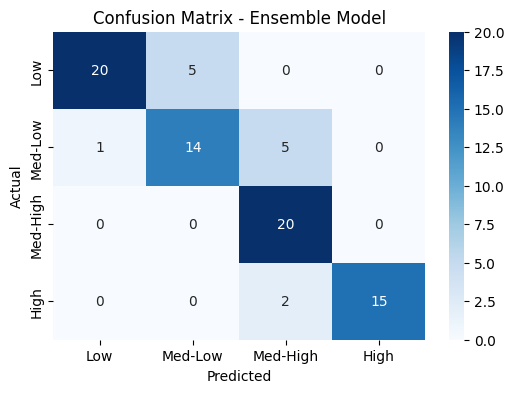

In [88]:
# Best performing models from each category with their best parameters
best_models =[('log_reg', LogisticRegression(**best_params["logistic_regression"])),
    ('decision_tree', DecisionTreeClassifier(**best_params["decision_tree_classifier"])),
    ('random_forest', RandomForestClassifier(**best_params["random_forest_classifier"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["gradient_boosting_classifier"])),
    ('knn', KNeighborsClassifier(**best_params["k_neighbors_classifier"])),
    ('svc', SVC(**best_params["svc"], probability=True))
]
              

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=best_models, voting='soft')

# Create a pipeline with StandardScaler and the ensemble model
pipeline_ensemble = Pipeline([
    ("scaler", StandardScaler()),
    ("ensemble", ensemble_model)
])

# Train the ensemble model
pipeline_ensemble.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_pred = pipeline_ensemble.predict(X_test)
evaluate_model(y_test, ensemble_pred, "Ensemble Model")


Stacking Ensemble Model:
Accuracy: 0.8536585365853658
Precision (macro): 0.8679029304029304
Recall (macro): 0.8580882352941176
F1-Score (macro): 0.8566576086956521

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.75      0.75      0.75        20
           2       0.77      1.00      0.87        20
           3       1.00      0.88      0.94        17

    accuracy                           0.85        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.87      0.85      0.85        82



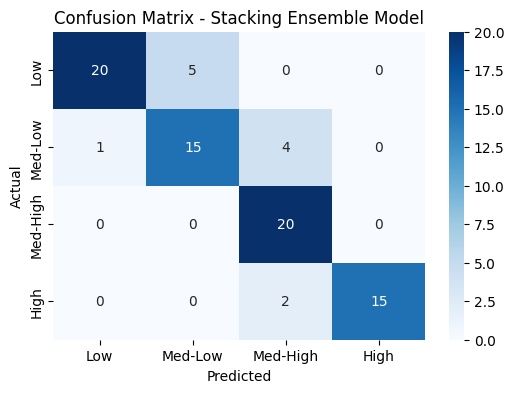

In [89]:
# Best performing models from each category
best_models =[('log_reg', LogisticRegression(**best_params["logistic_regression"])),
    ('decision_tree', DecisionTreeClassifier(**best_params["decision_tree_classifier"])),
    ('random_forest', RandomForestClassifier(**best_params["random_forest_classifier"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["gradient_boosting_classifier"])),
    ('knn', KNeighborsClassifier(**best_params["k_neighbors_classifier"])),
    ('svc', SVC(**best_params["svc"], probability=True))
]

# Define the stacking ensemble model
stacking_model_all = StackingClassifier(
    estimators=best_models,
    final_estimator=RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
)

# Create a pipeline with StandardScaler and the stacking model
pipeline_stacking_all = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", stacking_model_all)
])

# Train the stacking model
pipeline_stacking_all.fit(X_train, y_train)

# Evaluate the stacking model
stacking_pred_all = pipeline_stacking_all.predict(X_test)
evaluate_model(y_test, stacking_pred_all, "Stacking Ensemble Model")

In [90]:
print(best_params["feature_selection"])

['cylinders', 'displayments', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']



Best Random Forest Model:
Accuracy: 0.8658536585365854
Precision (macro): 0.8658971597792435
Recall (macro): 0.8655882352941177
F1-Score (macro): 0.8641854326703848

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.84      0.80      0.82        20
           2       0.78      0.90      0.84        20
           3       0.88      0.88      0.88        17

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.86        82
weighted avg       0.87      0.87      0.87        82



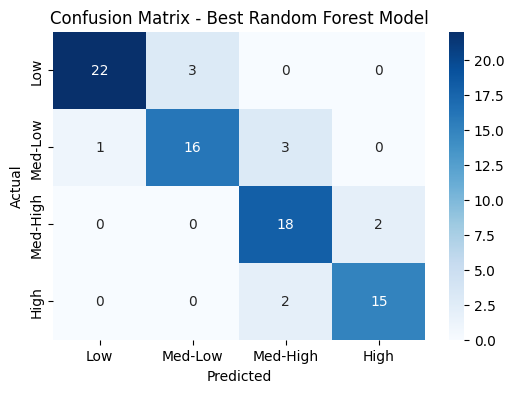

In [91]:

# Run again Random Forest with the best hyperams to compare with the stacking model 

# Define the best-tuned Random Forest model
best_random_forest = RandomForestClassifier(**best_params["random_forest_classifier"])

# Create a pipeline with StandardScaler and the Random Forest model
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest", best_random_forest)
])

# Ensure X_train and X_test are defined
X_selected = X[list(best_params["feature_selection"])]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Train the model
pipeline_rf.fit(X_train, y_train)

# Evaluate the model
rf_pred = pipeline_rf.predict(X_test)
evaluate_model(y_test, rf_pred, "Best Random Forest Model")


Best KNN Model:
Accuracy: 0.7560975609756098
Precision (macro): 0.7683823529411764
Recall (macro): 0.7583823529411764
F1-Score (macro): 0.7586601307189542

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.60      0.75      0.67        20
           2       0.70      0.70      0.70        20
           3       0.82      0.82      0.82        17

    accuracy                           0.76        82
   macro avg       0.77      0.76      0.76        82
weighted avg       0.78      0.76      0.76        82



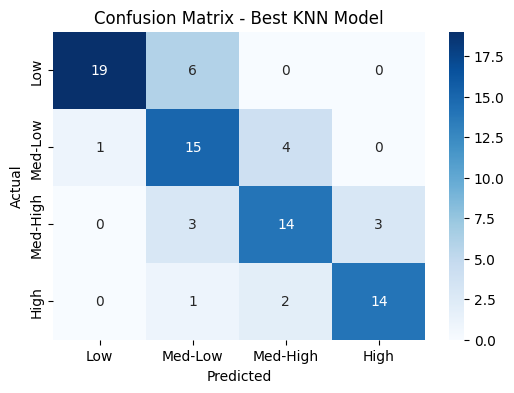

In [92]:
#Run the best-tuned KnN model to compare with the stacking model

#Define the best-tuned KNN model
best_knn = KNeighborsClassifier(**best_params["k_neighbors_classifier"])

#Create a pipeline with StandardScaler and the KNN model
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", best_knn)
])

#Ensure X_train and X_test are defined
X_selected = X[best_params["feature_selection"]]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Train the model
pipeline_knn.fit(X_train, y_train)

#Evaluate the model
knn_pred = pipeline_knn.predict(X_test)
evaluate_model(y_test, knn_pred, "Best KNN Model")




Best Gradient Boosting Model:
Accuracy: 0.8414634146341463
Precision (macro): 0.8555325511847252
Recall (macro): 0.8361764705882353
F1-Score (macro): 0.8383401666486051

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.83      0.75      0.79        20
           2       0.70      0.95      0.81        20
           3       0.93      0.76      0.84        17

    accuracy                           0.84        82
   macro avg       0.86      0.84      0.84        82
weighted avg       0.86      0.84      0.84        82



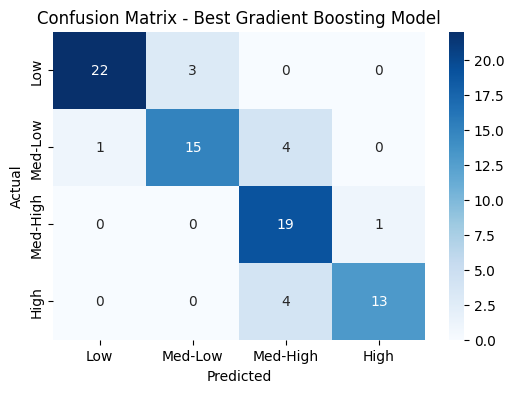

In [93]:
#Run the best-tuned Gradient Boosting model to compare with the stacking model

#Define the best-tuned Gradient Boosting model
best_gradient_boosting = GradientBoostingClassifier(**best_params["gradient_boosting_classifier"])

#Create a pipeline with StandardScaler and the Gradient Boosting model
pipeline_gb = Pipeline([
    ("scaler", StandardScaler()),
    ("gradient_boosting", best_gradient_boosting)
])

#Ensure X_train and X_test are defined
X_selected = X[best_params["feature_selection"]]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Train the model
pipeline_gb.fit(X_train, y_train)

#Evaluate the model
gb_pred = pipeline_gb.predict(X_test)
evaluate_model(y_test, gb_pred, "Best Gradient Boosting Model")


Best Logistic Regression Model:
Accuracy: 0.8414634146341463
Precision (macro): 0.8393986217675476
Recall (macro): 0.8380882352941177
F1-Score (macro): 0.8371670577655786

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.78      0.70      0.74        20
           2       0.74      0.85      0.79        20
           3       0.88      0.88      0.88        17

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.85      0.84      0.84        82



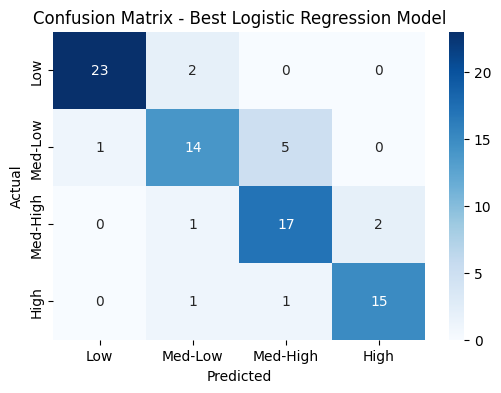

In [94]:
#Run the best-tuned Logistic Regression model to compare with the stacking model

#Define the best-tuned Logistic Regression model
best_log_reg = LogisticRegression(**best_params["logistic_regression"])

#Create a pipeline with StandardScaler and the Logistic Regression model
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", best_log_reg)
])

#Ensure X_train and X_test are defined

X_selected = X[best_params["feature_selection"]]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Train the model
pipeline_lr.fit(X_train, y_train)

#Evaluate the model
lr_pred = pipeline_lr.predict(X_test)
evaluate_model(y_test, lr_pred, "Best Logistic Regression Model")


Stacking Ensemble Model:
Accuracy: 0.9146341463414634
Precision (macro): 0.9252941176470588
Recall (macro): 0.9105882352941176
F1-Score (macro): 0.9128134384384384

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.94      0.80      0.86        20
           2       0.80      1.00      0.89        20
           3       1.00      0.88      0.94        17

    accuracy                           0.91        82
   macro avg       0.93      0.91      0.91        82
weighted avg       0.92      0.91      0.91        82



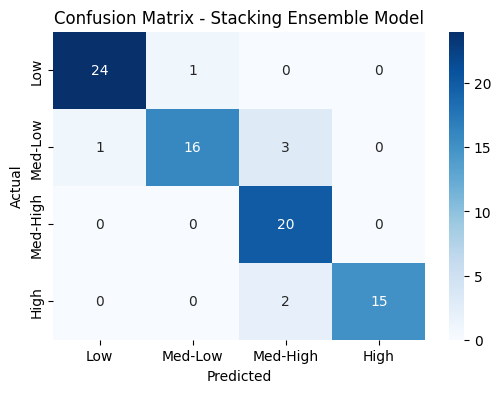

In [95]:
# Best performing models from each category
best_models = [
    ('random_forest', RandomForestClassifier(**best_params["random_forest_classifier"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["gradient_boosting_classifier"])),
    ('knn',KNeighborsClassifier(**best_params["k_neighbors_classifier"]))
]

# Define the stacking ensemble model
stacking_model_top_3 = StackingClassifier(
    estimators=best_models,
    final_estimator=RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
)

# Create a pipeline with StandardScaler and the stacking model
pipeline_stacking_top_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("stacking", stacking_model_top_3)
])

# Train the stacking model
pipeline_stacking_top_3.fit(X_train, y_train)

# Evaluate the stacking model
stacking_pred_top_3 = pipeline_stacking_top_3.predict(X_test)
evaluate_model(y_test, stacking_pred_top_3, "Stacking Ensemble Model")

In [96]:
import pickle

# Save the stacking model
with open('C:/welead/project/project_root/models/stacking_model.pkl', 'wb') as file:
    pickle.dump(stacking_pred_top_3, file)
